# Исследование московской системы общепита для оптимизации запуска стартапа в этой области и определения его перспектив

Создание бизнеса с нуля - крайне ответственное и рискованное решение. Принимать его можно только в том случае, если имеешь серьезные основания считать, что задумка увенчается успехом. Лучшим подтверждением подобного предположения могут стать данные о текущем состоянии рынка и его тенденциях, а также построенный на их основании анализ. Именно этому анализу и будет посвящен данный проект.

**Задача:** провести исследование рынка Москвы, обнаружить его интересные особенности и подготовить почву для открытия нового заведения общественного питания в столице.

**Этапы работы:** [предобработка](#prep), [исследование](#resch), [принятие решений и выводы](#sol), [презентация результатов](#pres).

## Материалы

https://drive.google.com/file/d/15QI8bugZoAOpJuWr7O8UveZgHbh5rihh/view?usp=sharing

## Получение данных и предобработка 
<a id="prep"></a> 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
plt.style.use('dark_background')

Начнем с получения и обработки данных:

In [2]:
df = pd.read_csv('moscow_places.csv')
df.head(5)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


Изучим структуру таблицы:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Сразу проверим данные на пропуски и дубликаты:

In [4]:
df.duplicated().sum()

0

In [5]:
df['name'].duplicated().sum()

2792

In [6]:
df.isnull().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

**Вывод:** полных дубликатов обнаружено не было, а дубликаты по столбцу name - это, вероятно, сетевые заведения. Трогать их не стоит. Критических пропусков по названиям или адресам в таблице нет. Много пропусков сконцентрировано в столбцах, связанных с со стоимостью. Заполнять их медианным значением нецелесообразно, поскольку их слишком много, а значит, подобное действие может чересчур исказить результаты исследования. По той же причине, удалять их тоже неправильно. Поэтому пока оставим эти значения в том виде, в котором они есть.

Бегло изучим возможные категориальные значения и диапазоны количественных значений из основных столбцов:

In [7]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [8]:
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [9]:
df['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

In [10]:
df['chain'].unique()

array([0, 1], dtype=int64)

In [11]:
print(f"Самый низкий рейтинг: {df['rating'].min()} | самый высокий рейтинг: {df['rating'].max()}")

Самый низкий рейтинг: 1.0 | самый высокий рейтинг: 5.0


In [12]:
print(f"Самый средний чек: {df['middle_avg_bill'].min()} | самый крупный чек: {df['middle_avg_bill'].max()}")

Самый средний чек: 0.0 | самый крупный чек: 35000.0


In [13]:
print(f"Минимальное количество мест: {df['seats'].min()} | максимальное количество мест: {df['seats'].max()}")

Минимальное количество мест: 0.0 | максимальное количество мест: 1288.0


Добавим в таблицу несколько новых столбцов:

In [14]:
def extract_street(x):
    box = x.split(', ')
    return box[1]

In [15]:
df['street'] = df['address'].apply(extract_street)

In [16]:
df['address'].str.split(', ').str[1]

0                 улица Дыбенко
1                 улица Дыбенко
2            Клязьминская улица
3       улица Маршала Федоренко
4           Правобережная улица
                 ...           
8401          Профсоюзная улица
8402      Пролетарский проспект
8403           Люблинская улица
8404           Люблинская улица
8405        Россошанский проезд
Name: address, Length: 8406, dtype: object

In [17]:
df[df['street'].notna()].head(3)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица Дыбенко
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица Дыбенко
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,Клязьминская улица


В отдельный столбец выделим из адреса название улицы.

In [18]:
def is_daily(x):
    return 'ежедневно, круглосуточно' in str(x)

In [19]:
df['is_24/7'] = df['hours'].apply(is_daily)

In [20]:
df[df['is_24/7']].head(2)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
10,Great Room Bar,"бар,паб","Москва, Левобережная улица, 12",Северный административный округ,"ежедневно, круглосуточно",55.877832,37.469171,4.5,средние,Цена бокала пива:250–350 ₽,NaN,NaN,0,102.0,Левобережная улица,True
17,Чайхана Беш-Бармак,ресторан,"Москва, Ленинградское шоссе, 71Б, стр. 2",Северный административный округ,"ежедневно, круглосуточно",55.876908,37.449876,4.4,средние,Средний счёт:350–500 ₽,425.0,NaN,0,96.0,Ленинградское шоссе,True


В другой столбец вынесли маркер, показывающий, что заведение работает круглосуточно.

**Вывод:** мы разобрались в данных, убедились, что они принадлежат к верным типам, предупредили возможные ошибки и немного дополнили таблицу. Теперь самое время перейти к анализу.

## Исследование и анализ
<a id="resch"></a> 

Изучим более тщательно распределение заведений города по категориям:

In [21]:
cats_gr = df.groupby('category').agg({'address' : 'count'}).sort_values(by='address',ascending=False)
cats_gr.columns = ['count']
cats_gr['category'] = cats_gr.index
cats_gr = cats_gr.reset_index(drop=True)
cats_gr

,count,category
0,2378,кафе
1,2043,ресторан
2,1413,кофейня
3,765,"бар,паб"
4,633,пиццерия
5,603,быстрое питание
6,315,столовая
7,256,булочная


In [22]:
def create_bar(x,y,color,title,xlabel,ylabel,rotation):
    fig, ax = plt.subplots(figsize=(9,6),dpi=100)
    ax.bar(x=x,height=y,color=color)
    ax.set_title(title,fontsize=16)
    ax.set_xlabel(xlabel,fontsize=14)
    ax.set_ylabel(ylabel,fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels=x,rotation=rotation,fontsize=12)
    sns.despine()
    plt.show()

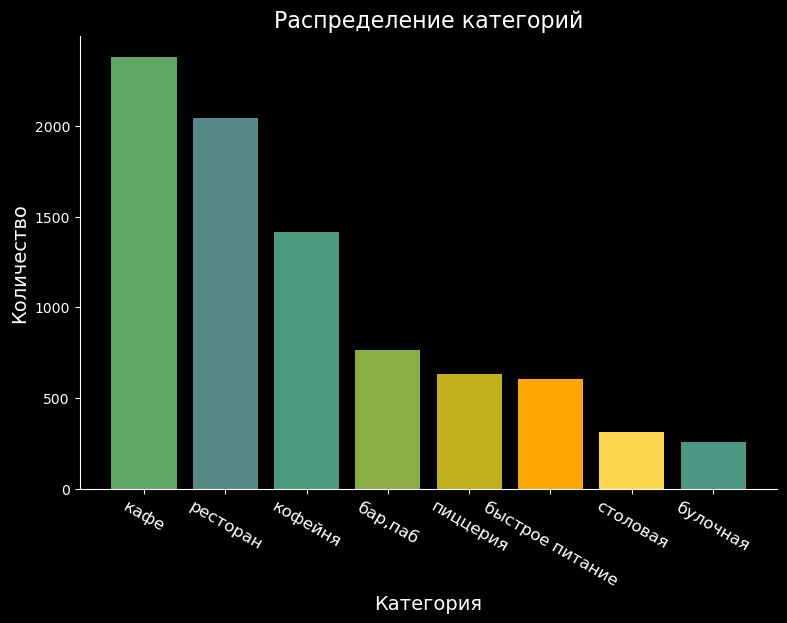

In [23]:
create_bar(cats_gr['category'],cats_gr['count'],['#60a667',"#558a86",'#4c9a7e','#8aae44','#c0af1a','#ffa600','#ffd84d','#4c9682'],
           'Распределение категорий','Категория','Количество',-30)

**Вывод:** очевидно, что в городе преобладают кафе, кофейни и рестораны. Прочие категории заведений заметно отстают в числе.

Исследуем количество посадочных мест в каждой из категорий заведений:

In [24]:
cats_st_median = df.groupby('category').agg({'seats' : 'median'})
cats_st_mean = df.groupby('category').agg({'seats' : 'mean'})
cats_st = cats_st_median.merge(cats_st_mean,how='left',on=cats_st_median.index)
cats_st.columns = ['category','median','mean']
cats_st = cats_st.sort_values(by='median',ascending=False).reset_index(drop=True)

In [25]:
cats_st

,category,median,mean
0,ресторан,86.0,121.944094
1,"бар,паб",82.5,124.532051
2,кофейня,80.0,111.199734
3,столовая,75.5,99.750000
4,быстрое питание,65.0,98.891117
5,кафе,60.0,97.512315
6,пиццерия,55.0,94.496487
7,булочная,50.0,89.385135


Для более точного анализа построим boxplot, который позволит визуально отследить средние значения и выбросы:

In [26]:
def create_box(x,y,title,xlabel,ylabel,ylim,color):
    fig, ax = plt.subplots(figsize=(12,6),dpi=120)
    sns.boxplot(x=x,y=y,palette=color)
    ax.set_title(title,fontsize=16)
    ax.set_xlabel(xlabel,fontsize=14)
    ax.set_ylabel(ylabel,fontsize=14)
    ax.set_ylim(0,ylim)
    sns.despine()
    plt.show()

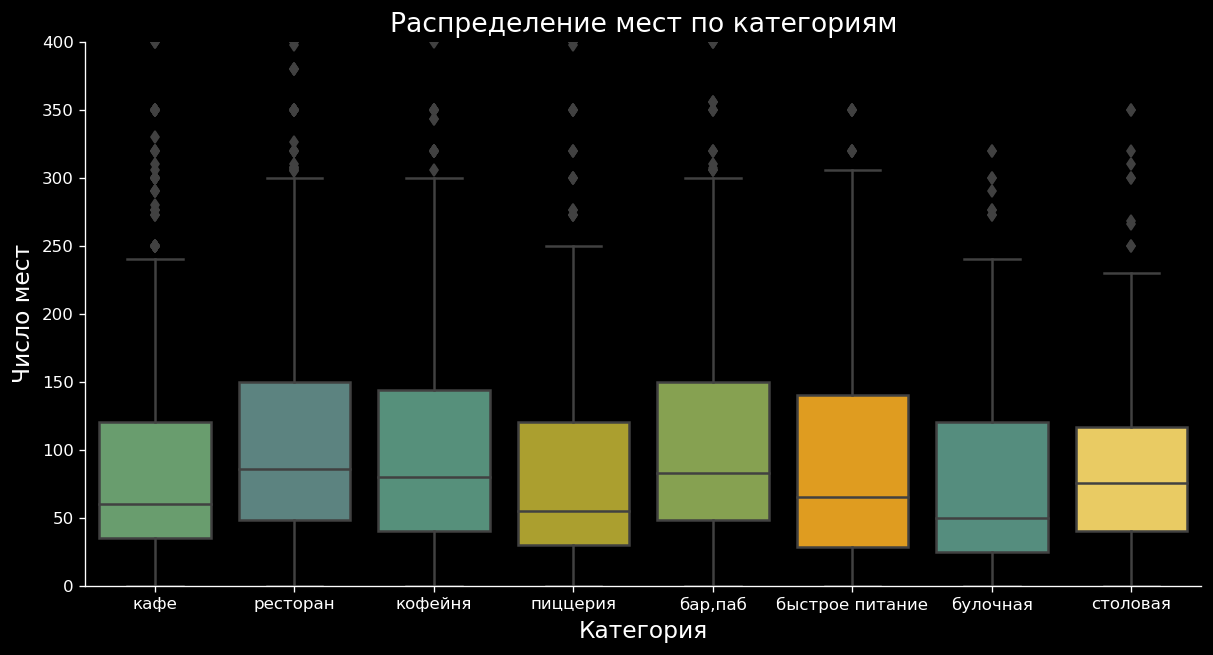

In [27]:
pal = {'ресторан':"#558a86",'бар,паб':'#8aae44','кофейня':'#4c9a7e',
       'столовая':'#ffd84d','быстрое питание':'#ffa600','кафе':'#60a667',
      'пиццерия':'#c0af1a','булочная':'#4c9682'}
create_box(df['category'],df['seats'],'Распределение мест по категориям','Категория','Число мест',400,pal)

**Вывод:** среднее значение мест по категориям разнится не слишком сильно. В меньшую сторону склоняются пиццерии и булочные, в большую - рестораны. Однако дефолтное значение варьируется приблизительно от 60 до 90.

Сравним сетевые и несетевые заведения города:

In [28]:
print(f"В Москве {df['chain'].sum()} сетевых заведений и {len(df)-df['chain'].sum()} несетевых заведений")

В Москве 3205 сетевых заведений и 5201 несетевых заведений


Несетевых заведений больше, но как обстоят дела по категориям?

In [29]:
def find_part(row,b=cats_gr):
    x = row['category']
    total = int(b[b['category']==x]['count'])
    return np.around(row['count']/total,3)

In [30]:
a = df.groupby(['category','chain']).agg({'address':'count'}).rename(columns={'address':'count'})
a['chain'] = [i[1] for i in a.index]
a = a.droplevel('chain')
a['category'] = a.index
a = a.reset_index(drop=True)
a['part'] = a.apply(find_part,axis=1)
a = a.sort_values(by=['part'],ascending=False).reset_index(drop=True)
a

,count,chain,category,part
0,596,0,"бар,паб",0.779
1,227,0,столовая,0.721
2,1599,0,кафе,0.672
3,1313,0,ресторан,0.643
4,371,0,быстрое питание,0.615
5,157,1,булочная,0.613
6,330,1,пиццерия,0.521
7,720,1,кофейня,0.510
8,693,0,кофейня,0.490
9,303,0,пиццерия,0.479


In [31]:
def create_twinbar(x,y,title,xlabel,ylabel,hue,palette):
    fig, ax = plt.subplots(figsize=(12,6),dpi=120)
    sns.barplot(data=a,x=x,y=y,hue=hue,palette=palette)
    ax.set_title(title,fontsize=16)
    ax.set_xlabel(xlabel,fontsize=14)
    ax.set_ylabel(ylabel,fontsize=14)
    sns.despine()
    plt.show()

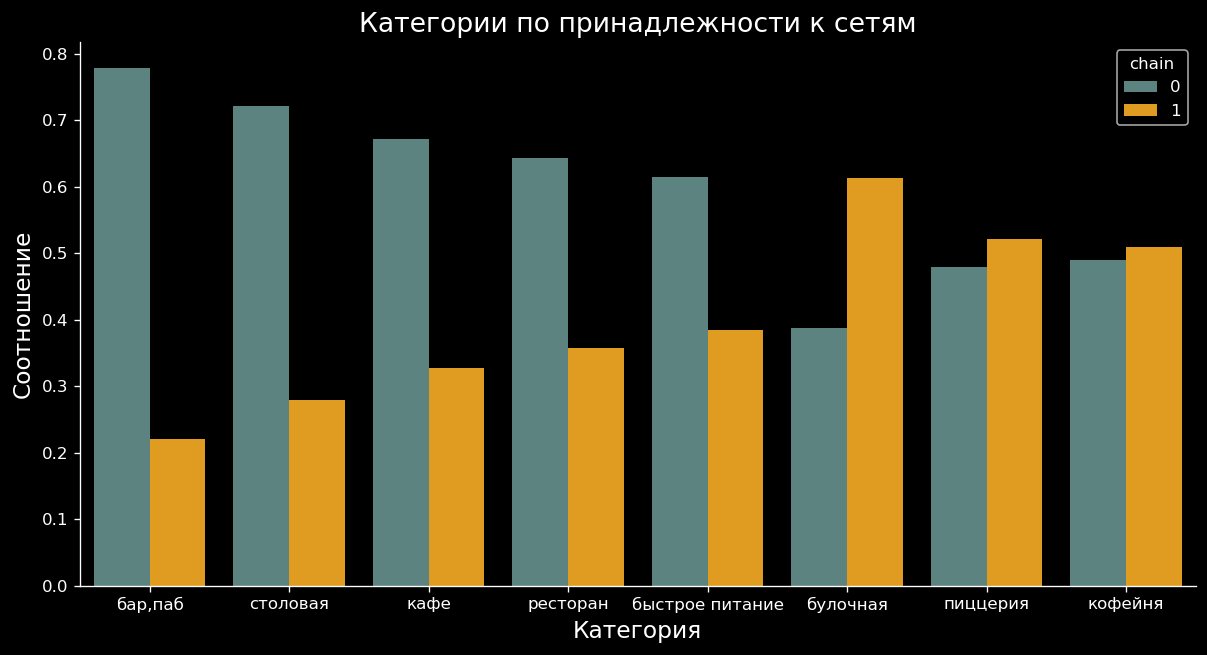

In [32]:
create_twinbar(a['category'],a['part'],'Категории по принадлежности к сетям',
               'Категория','Соотношение',a['chain'],['#558a86','#ffa600'])

**Вывод:** больше булочные, пиццерии и кофейни чаще всего оказываются сетевыми, в то время как бары, столовые, кафе, рестораны и точки быстрого питания в большинстве случаев представляют из себя самостоятельные заведения.

Далее рассмотрим перечень самых популярных сетей Москвы. Отберем их по следующему признаку: возьмем те сети, у которых в городе больше всего филиалов.

In [33]:
best_chains = df[df['chain']==1].groupby('name').agg({'name':'count','category':'first'}).\
rename(columns={'name':'count'}).sort_values(by='count',ascending=False)
best_chains = best_chains.head(15)
best_chains

,count,category
name,,
Шоколадница,120,кофейня
Домино'с Пицца,76,пиццерия
Додо Пицца,74,пиццерия
One Price Coffee,71,кофейня
Яндекс Лавка,69,ресторан
Cofix,65,кофейня
Prime,50,ресторан
Хинкальная,44,быстрое питание
КОФЕПОРТ,42,кофейня


In [34]:
def create_multybar(x,y,hue,palette,title,xaxis,yaxis,legtitle):
    fig = px.bar(x=x,y=y,color=hue,color_discrete_sequence=palette)
    fig.update_layout(width=950,height=550,title=title,xaxis_title=xaxis,
                      yaxis_title=yaxis,template="plotly_dark",font=dict(size=15),legend=dict(title=legtitle))
    fig.show("png")

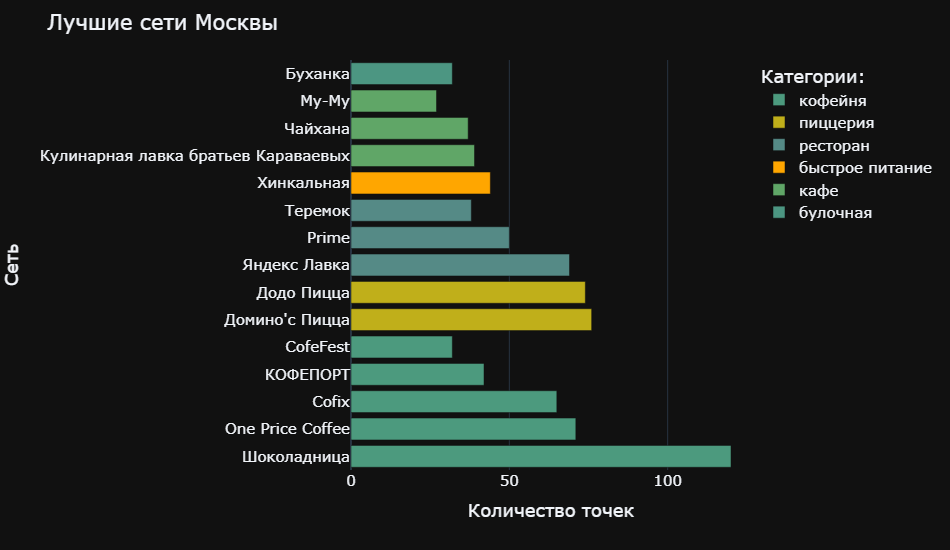

In [35]:
create_multybar(best_chains['count'],best_chains.index,best_chains['category'],
                ["#4c9a7e",'#c0af1a','#558a86','#ffa600','#60a667','#4c9682'],
               'Лучшие сети Москвы',"Количество точек",'Сеть',"Категории:")

**Вывод:** эти сети действительно достаточно известны. Среди них больше всего кофейен, однако есть также рестораны, кафе и представители прочих категорий.

Посмотрим, как обстоят дела с категориями заведений по районам:

In [36]:
dist_cat = df.groupby(['district','category']).agg({'address':'count'})
dist_cat['category'] = [i[1] for i in dist_cat.index]
dist_cat = dist_cat.droplevel('category')
dist_cat['district'] = dist_cat.index
dist_cat = dist_cat.reset_index(drop=True)
dist_cat = dist_cat.rename(columns={'address':'count'})
dist_cat.head()

,count,category,district
0,53,"бар,паб",Восточный административный округ
1,25,булочная,Восточный административный округ
2,71,быстрое питание,Восточный административный округ
3,272,кафе,Восточный административный округ
4,105,кофейня,Восточный административный округ


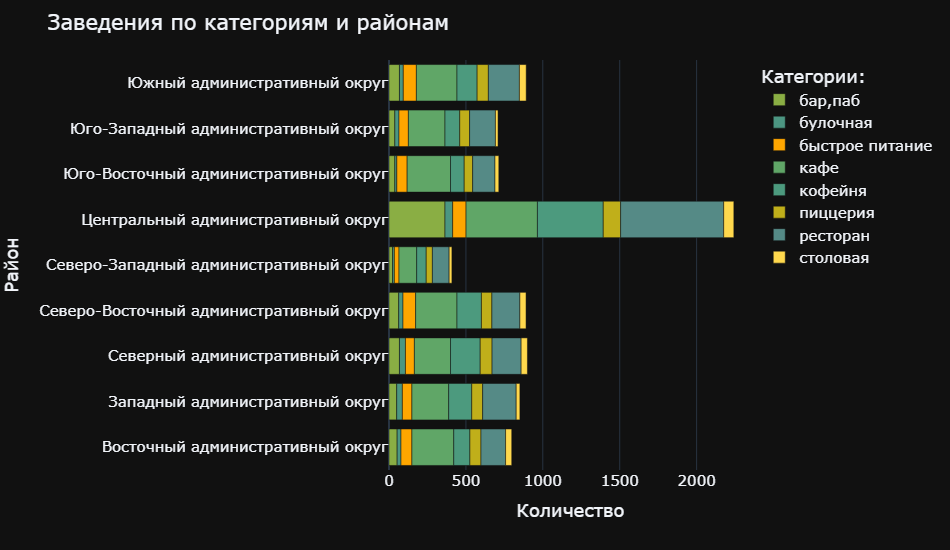

In [37]:
create_multybar(dist_cat['count'],dist_cat['district'],dist_cat['category'],['#8aae44','#4c9682','#ffa600','#60a667','#4c9a7e','#c0af1a',"#558a86",'#ffd84d'],
               'Заведения по категориям и районам',"Количество",'Район',"Категории:")

**Вывод:** категории заведений распределены по районам относительно равномерно, однако почти везде превалируют кафе и рестораны. Самое большое число общепитов расположено в Центральном округе. Северо-Западный округ отстает от других по всем статьям.

Оценим все категории заведений по их средним оценкам в системе Яндекс Карт:

In [38]:
cat_rat = df.groupby('category').agg({'rating':'mean'}).sort_values(by='rating',ascending=False)
cat_rat['rating'] = np.around(cat_rat['rating'],3)
cat_rat

,rating
category,
"бар,паб",4.388
пиццерия,4.301
ресторан,4.290
кофейня,4.277
булочная,4.268
столовая,4.211
кафе,4.124
быстрое питание,4.050


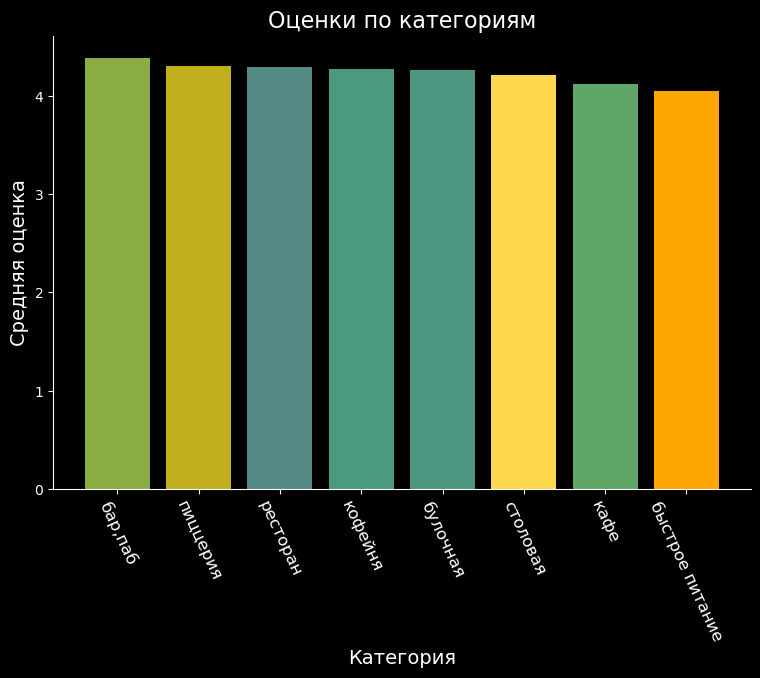

In [39]:
create_bar(cat_rat.index,cat_rat['rating'],['#8aae44','#c0af1a',"#558a86",'#4c9a7e','#4c9682','#ffd84d','#60a667','#ffa600'],
           'Оценки по категориям','Категория','Средняя оценка',-65)

**Вывод:** если рассматривать чистые средние оценки по категориям без влияния сторонних факторов, то можно сказать, что существенной разницы между ними нет. Выходит, что все зависит не от категории, а от конкретного заведения.

Разберем полученное распределение более тщательно: выделим 15 наиболее популярных для подобных заведений улиц.

In [40]:
street_cat = df.groupby(['street','category']).agg({'address':'count'})
street_cat['category'] = [i[1] for i in street_cat.index]
street_cat = street_cat.droplevel('category')
street_cat['street'] = street_cat.index
street_cat = street_cat.reset_index(drop=True)
street_cat = street_cat.rename(columns={'address':'count'})
street_cat.head()

,count,category,street
0,1,кафе,1-й Автозаводский проезд
1,1,ресторан,1-й Балтийский переулок
2,1,кафе,1-й Варшавский проезд
3,1,кафе,1-й Вешняковский проезд
4,1,кафе,1-й Волоколамский проезд


In [41]:
ogr = df.groupby('street').agg({'address':'count'}).sort_values(by='address',ascending=False).head(15)

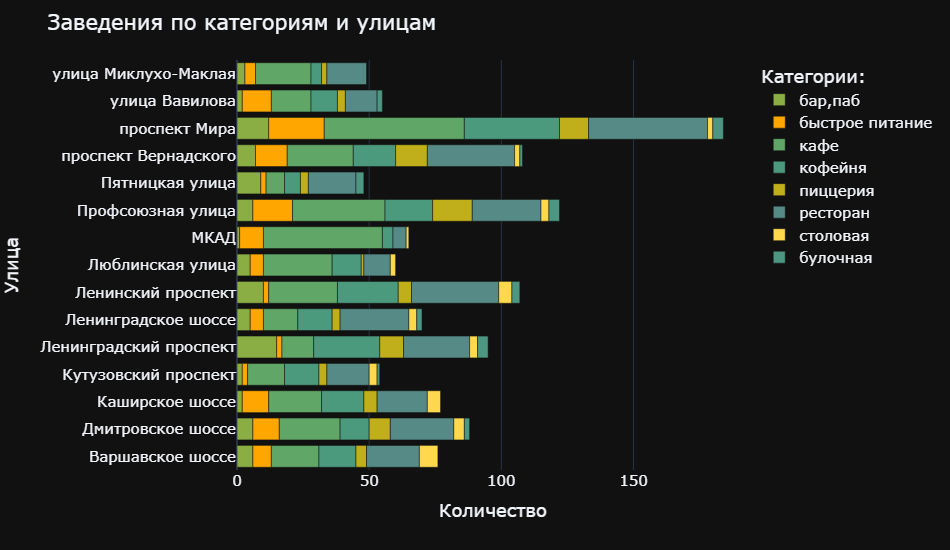

In [42]:
create_multybar(street_cat[street_cat['street'].isin(ogr.index)]['count'],street_cat[street_cat['street'].isin(ogr.index)]['street'],street_cat[street_cat['street'].isin(ogr.index)]['category'],
                ['#8aae44','#ffa600','#60a667','#4c9a7e','#c0af1a','#558a86',"#ffd84d",'#4c9682'],
                'Заведения по категориям и улицам',"Количество",'Улица',"Категории:")

**Вывод:** наилучшие результаты по количеству заведений общепита показывает простект Мира. За ним следуют Профсоюзная улица, Ленинский проспект, проспект Вернадского и другие. На этих улицах количество кафе и ресторанов разительно выделяется на фоне прочих категорий. Следуюущей по популярости категорией являются кофейни.

In [43]:
worst_streets =  df.groupby('street').agg({'address':'count'}).sort_values(by='address').rename(columns={'address':'count'})
worst_streets = worst_streets[worst_streets['count']==1]
worst_streets.head()

,count
street,
1-й Автозаводский проезд,1
Одинцовская улица,1
Октябрьский переулок,1
Ордынский тупик,1
Оренбургская улица,1


In [44]:
len(worst_streets)

458

В Москве также есть 458 улиц, на которых расположено только по 1 заведению. Какие-то из этих улиц могут быть слишком малы, какие-то - слишком безлюдны, а какие-то могут быть выгодными точками, на которых одно заведение удерживает монопольную власть. Обобщать в данном случае было бы неправильно.

Попробуем посчитать медианное значение средних чеков для заведений каждого района:

In [45]:
samp = df[df['middle_avg_bill'].notna()]
samp.head(2)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица Дыбенко,False
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,Клязьминская улица,False


In [46]:
samp_gr = samp.groupby('district',as_index=False).agg({'middle_avg_bill':'median'}).\
rename(columns={'middle_avg_bill':'median_district_bill'}).sort_values(by='median_district_bill',ascending=False)
samp_gr

,district,median_district_bill
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
2,Северный административный округ,650.0
7,Юго-Западный административный округ,600.0
0,Восточный административный округ,575.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
6,Юго-Восточный административный округ,450.0


**Вывод:** самые высокие цены наблюдаются, вновь, в центре Москвы. Далее, по мере отдаления от него на Север и на Восток, цены планомерно уменьшаются. Однако Западное и Юго-Западное направление сохраняют довольно высокую планку цен до самых границ города.

### Итоги анализа:

Проведенный анализ рынка позволил сделать следующие выводы:

1) Наибольшая активность данного сектора прослеживается в центральном районе города. Там наиболее высокая конкуренция, но и самый высокий спрос, а следовательно - цены.

2) Большой популярностью у заведений общественного питания пользуется Проспект мира. Там очень много кафе и ресторанов.

3) Средние оценки заведений значимо не зависят ни от их категории, ни от их места расположения. Это значит, что при прочих равных всегда можно достичь достойного результата, если предоставлять действительно качественный сервис.

4) Рынок булочных и пиццерий более чем на половину занят крупными и небольшими сетями, поэтому войти на него будет сложнее.

5) Кафе и ресторанов в городе уже очень много. На этом рынке можно столкнуться с переизбытком предложения.

## Решения и выводы
<a id="sol"></a> 

На основании проведенного анализа было решено, что оптимальным выбором при текущих рыночных условиях будет открытие **кофейни**. Следовательно, следующий этап работы будет посвящен подготовке почвы конкретно для этого, а также вынесению окончательного вердикта по работе.

In [47]:
cof = df[df['category']=='кофейня']

In [48]:
print(f"Всего в Москве {cof['name'].count()} кофеен")

Всего в Москве 1413 кофеен


In [49]:
cof_dis_cnt = cof.groupby('district',as_index=False).agg({'address':'count'}).rename(columns={'address':'count'}).\
sort_values(by='count',ascending=False).reset_index(drop=True)
cof_dis_cnt

,district,count
0,Центральный административный округ,428
1,Северный административный округ,193
2,Северо-Восточный административный округ,159
3,Западный административный округ,150
4,Южный административный округ,131
5,Восточный административный округ,105
6,Юго-Западный административный округ,96
7,Юго-Восточный административный округ,89
8,Северо-Западный административный округ,62


Больше всего кофейен в Центральном округе. В остальных конкуренция ниже, Северо-Западный округ развит совсем слабо.

In [50]:
cof_dis_rat = cof.groupby('district',as_index=False).agg({'rating':'mean'})
cof_dis_rat

,district,rating
0,Восточный административный округ,4.282857
1,Западный административный округ,4.195333
2,Северный административный округ,4.291710
3,Северо-Восточный административный округ,4.216981
4,Северо-Западный административный округ,4.325806
5,Центральный административный округ,4.336449
6,Юго-Восточный административный округ,4.225843
7,Юго-Западный административный округ,4.283333
8,Южный административный округ,4.232824


Оценки у кофеен стандартные и слабо варьирующиеся в зависимости от района.

Вычислим приблизительную цену чашки капучино, на которую имеет смысл ориентированиться:

In [51]:
cost = cof[['middle_coffee_cup','price']].reset_index(drop=True)

In [52]:
cost['middle_coffee_cup'].mean()

175.0556621880998

In [53]:
cost['middle_coffee_cup'].median()

170.0

Судя по всему, цена должна быть чуть больше 170 рублей.

In [54]:
cof_price = cof.groupby('price',as_index=False).agg({'name':'count'}).rename(columns={'name':'count'}).\
sort_values(by='count',ascending=False).reset_index(drop=True)
cof_price

,price,count
0,средние,377
1,низкие,68
2,высокие,17
3,выше среднего,14


Подавляюее большинство кофеен в городе относятся к средней ценовой категории. Кофеен выской категории и категории выше среднего совсем мало.

In [55]:
def cut_name(x):
    box = str(x).split()
    return box[0]

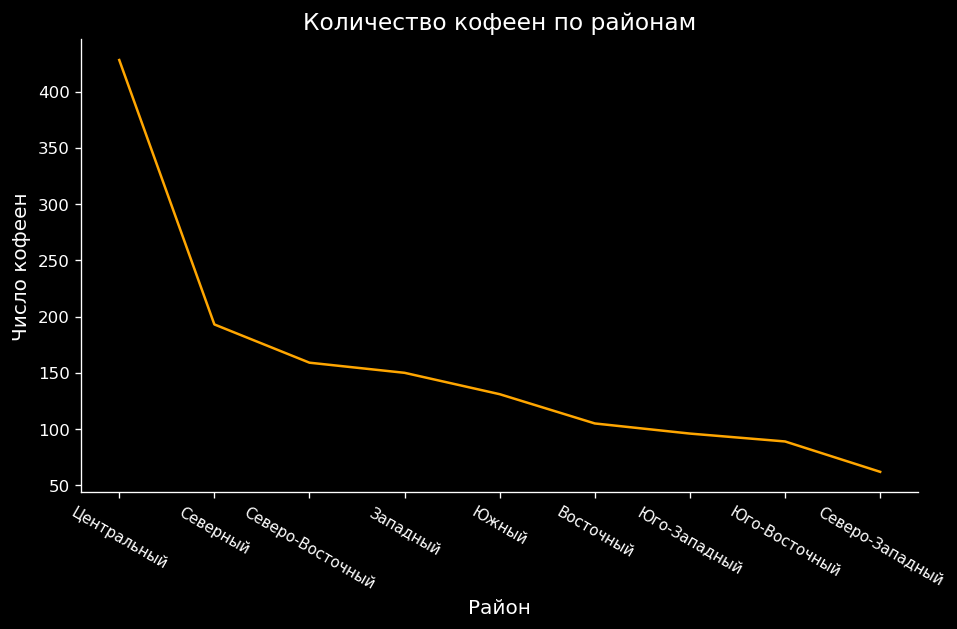

In [56]:
fig, ax = plt.subplots(figsize=(9,5),dpi=120)
sns.lineplot(x=cof_dis_cnt['district'],y=cof_dis_cnt['count'],color='#ffa600')
ax.set_title('Количество кофеен по районам',fontsize=14)
ax.set_xlabel("Район",fontsize=12)
ax.set_ylabel('Число кофеен',fontsize=12)
ax.set_xticks(cof_dis_cnt['district'])
ax.set_xticklabels(labels=cof_dis_cnt['district'].apply(cut_name),rotation=-30,fontsize=9)
sns.despine()
plt.show()

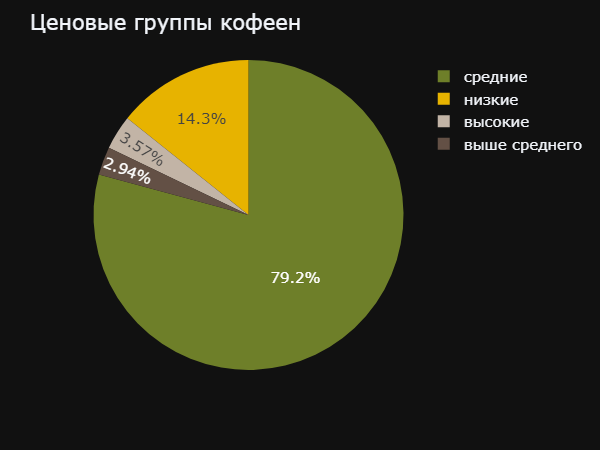

In [57]:
fig = px.pie(values=cof_price['count'], names=cof_price['price'],
             color_discrete_sequence=['#6e7f29','#e7b300','#c2b4a6','#635045'])
fig.update_layout(width=600,height=450,title='Ценовые группы кофеен',template="plotly_dark",font=dict(size=15))
fig.show("png")

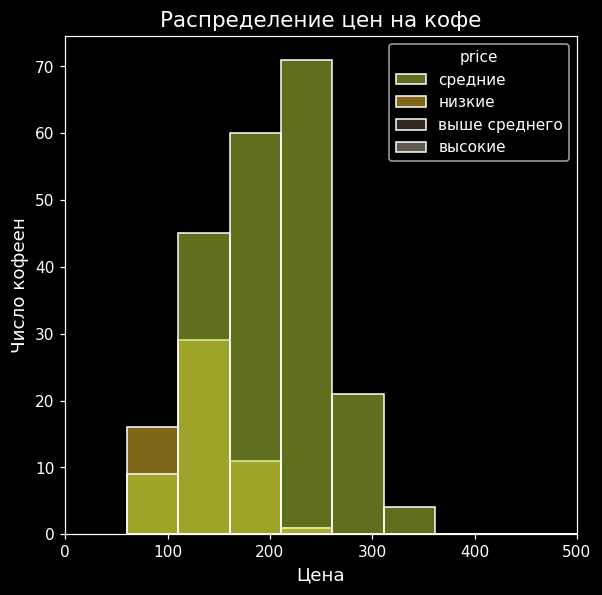

In [58]:
fig, ax = plt.subplots(figsize=(6,6),dpi=110)
sns.histplot(data=cost,x='middle_coffee_cup',hue='price',bins=30,palette=['#bedf3a','#ffcf33','#635045','#c2b4a6'])
ax.set_title('Распределение цен на кофе',fontsize=14)
ax.set_xlabel("Цена",fontsize=12)
ax.set_ylabel('Число кофеен',fontsize=12)
ax.set_xlim(0,500)
plt.show()

К сожалению, информация о ценовой категории есть лишь о половине кофеен и распределена она не равномерно, поэтому делать какие-либо серьезные выводы по ней трудно. Однако некое общее представление получившийся график все же дает. В заведениях низкой категории цена в основном составляетот 100 до 170 рублей. В средних заведениях же она начинается от 170 и может достигать приблизительно 240.

### Резюме:

Анализ рынка московских кофеен завершен, и теперь можно тезисно озвучить собранные рекомендации.

1) Конкурентное преимущество на рынке кофеен в Москве можно получить за счет занятия выгодного географического расположения и свободного ценового сегмента.

2) Как вариант, кофейню можно открыть в Северном или Северо-Восточном округе, чтобы иметь достаточно большую аудиторию, но при этом не сталкиваться с чрезмерной конкуренцией.

3) Позиционировать себя стоит как заведение категории "выше среднего" и цены устанавливать соответствующие. Чашку капучино в данном случае можно продавать по цене от 200 рублей и выше, однако сервис при этом должен поддерживаться на высоком уровне.

4) Хорошим ходом будет работать круглосуточно. Это создаст определенные издержки, однако закроет потребности большой прослойки потенциальных клиентов, которые сейчас не удовлетворяются.

5) Чтобы не отставать от конкурентов, в кофейне следует держать около 70 мест.

**Вывод:** при условии соблюдения вышеуказанных рекомендаций, стартап-кофейня вполне имеет право на жизни и может в перспективе принести создателям прибыль.